In [1]:
import numpy as np
import scipy.integrate as ode
import random as rd
import os
import time
from tqdm import tqdm
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.colorbar as mcolorbar
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib import gridspec


# ODE function
def repressilator(t,z):
    x,x1,x2=z
    dxdt=alpha+beta/(1+(x2**n)) - d*x
    dx1dt=beta/(1+(x**n)) - d*x1
    dx2dt=beta/(1+(x1**n)) - d*x2
    return [dxdt,dx1dt,dx2dt]


The function is given by
$$\frac{dx}{dt}=\alpha+\beta\frac{1}{1+x_2^n}-dx$$
$$\frac{dx_1}{dt}=\beta\frac{1}{1+x^n}-dx_1$$
$$\frac{dx_2}{dt}=\beta\frac{1}{1+x_1^n}-dx_2$$

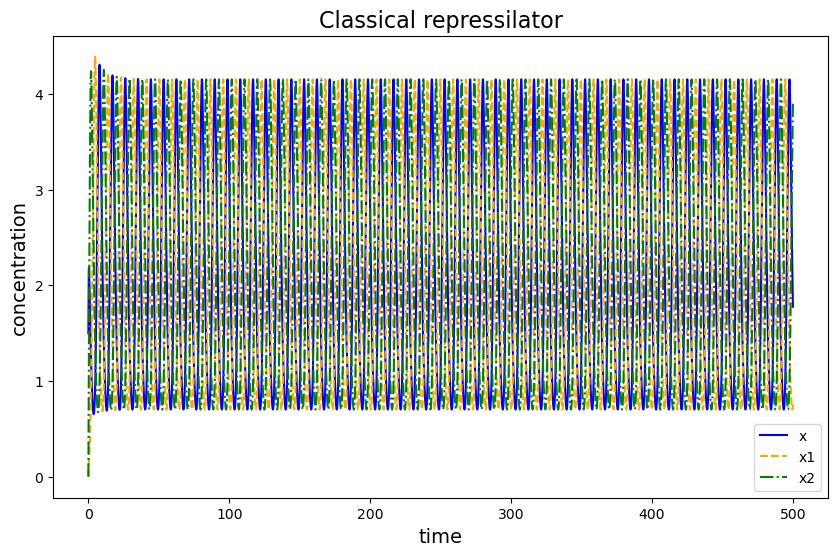

In [20]:
# simulation setting
simu_time=500
timespan=(0,simu_time)
z0=[1.5,0,0]
alpha=0     # external regulation
n=3         # hill coef
d=0.5       # degradation
beta=4      # hill constant


results=ode.solve_ivp(repressilator, timespan, z0, t_eval=np.linspace(0,simu_time,simu_time*100+1), method='RK45', rtol=1e-6, atol=1e-9)

# plotting
plt.figure(figsize=(10, 6))
plt.plot(results.t, results.y[0], label='x', color='blue', linestyle='-')  # 蓝色实线
plt.plot(results.t, results.y[1], label='x1', color='orange', linestyle='--')  # 橙色虚线
plt.plot(results.t, results.y[2], label='x2', color='green', linestyle='-.')  # 绿色点划线

plt.title('Classical repressilator', fontsize=16)
plt.xlabel('time', fontsize=14)
plt.ylabel('concentration', fontsize=14)
plt.legend()

plt.show()

In [21]:
# peak detection
from scipy.signal import find_peaks
peaks, _ = find_peaks(results.y[0], height=0, distance=5)  # 设置合适的距离参数
if len(peaks) > 1:
    periods = np.diff(results.t[peaks])
"""
values, counts = np.unique(periods, return_counts=True)
mode = values[np.argmax(counts)]
print(mode) """

import use_function as uf
mode=uf.find_most_frequent_number(periods)
print(mode)

9.060000000000002


The following codes show effects of parameters.

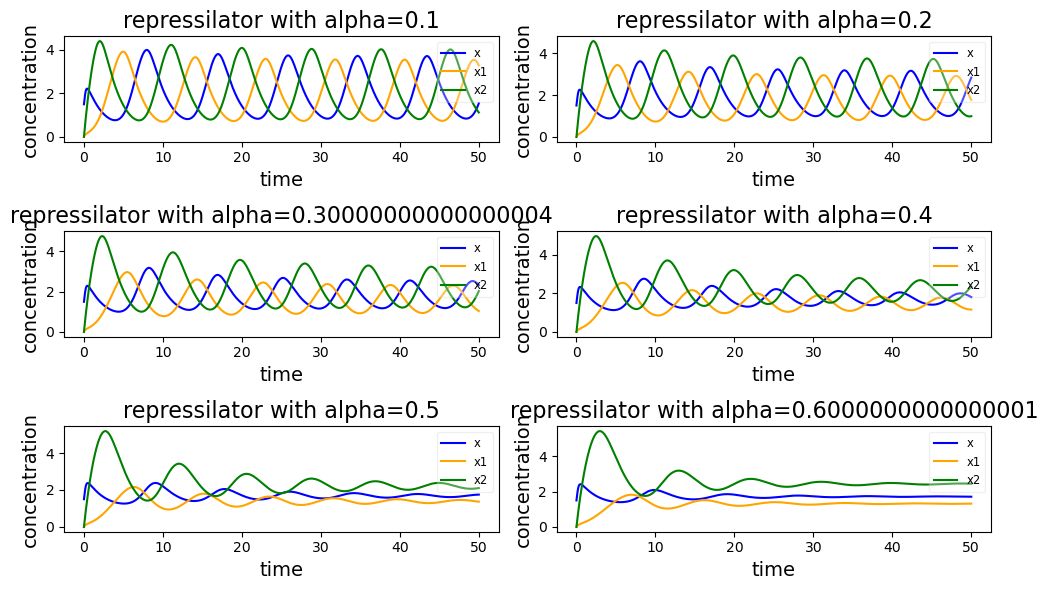

In [4]:
# simulation setting
simu_time=50
timespan=(0,simu_time)
z0=[1.5,0,0]
alpha=0     # external regulation
n=3         # hill coef
d=0.5       # degradation
beta=4      # hill constant


plt.figure(figsize=(10, 6))
for i in range(1,7):
    alpha=0.1*i
    results[i]=ode.solve_ivp(repressilator, timespan, z0, t_eval=np.linspace(0,simu_time,simu_time*100+1), method='RK45', rtol=1e-6, atol=1e-9)
    plt.subplot(3, 2, i)
    plt.plot(results[i].t, results[i].y[0], label='x', color='blue', linestyle='-')  # 蓝色实线
    plt.plot(results[i].t, results[i].y[1], label='x1', color='orange', linestyle='-')  # 橙色虚线
    plt.plot(results[i].t, results[i].y[2], label='x2', color='green', linestyle='-')  # 绿色点划线
    plt.title('repressilator with alpha='+str(alpha), fontsize=16)
    plt.xlabel('time', fontsize=14)
    plt.ylabel('concentration', fontsize=14)
    plt.legend(loc='upper right',fontsize='small',framealpha=0.3)

plt.tight_layout()
plt.show()

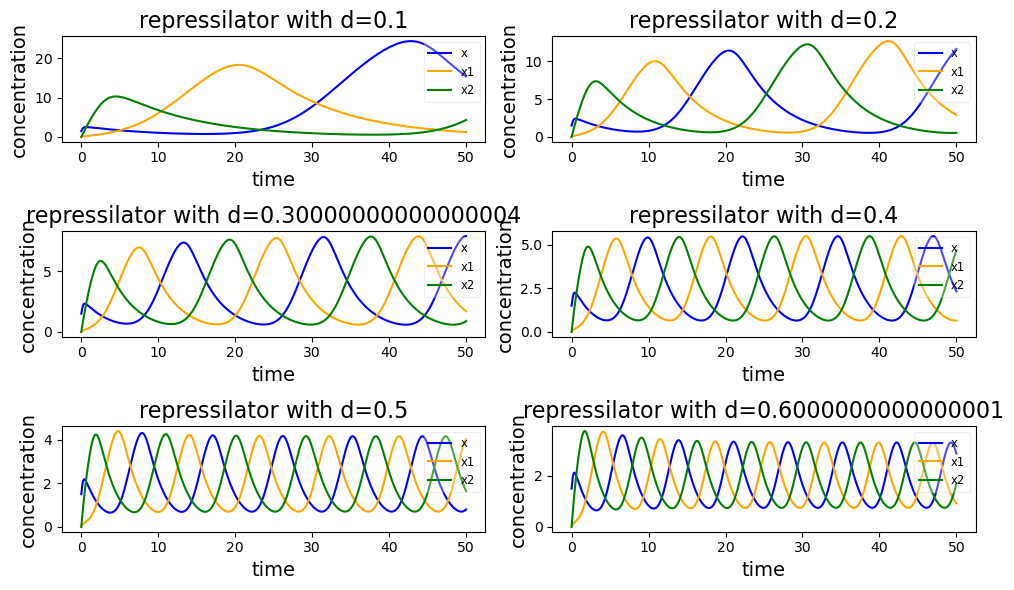

In [5]:
# simulation setting
simu_time=50
timespan=(0,simu_time)
z0=[1.5,0,0]
alpha=0     # external regulation
n=3         # hill coef
d=0.5       # degradation
beta=4      # hill constant


plt.figure(figsize=(10, 6))
for i in range(1,7):
    d=0.1*i
    results[i]=ode.solve_ivp(repressilator, timespan, z0, t_eval=np.linspace(0,simu_time,simu_time*100+1), method='RK45', rtol=1e-6, atol=1e-9)
    plt.subplot(3, 2, i)
    plt.plot(results[i].t, results[i].y[0], label='x', color='blue', linestyle='-')  # 蓝色实线
    plt.plot(results[i].t, results[i].y[1], label='x1', color='orange', linestyle='-')  # 橙色虚线
    plt.plot(results[i].t, results[i].y[2], label='x2', color='green', linestyle='-')  # 绿色点划线
    plt.title('repressilator with d='+str(d), fontsize=16)
    plt.xlabel('time', fontsize=14)
    plt.ylabel('concentration', fontsize=14)
    plt.legend(loc='upper right',fontsize='small',framealpha=0.3)

plt.tight_layout()
plt.show()

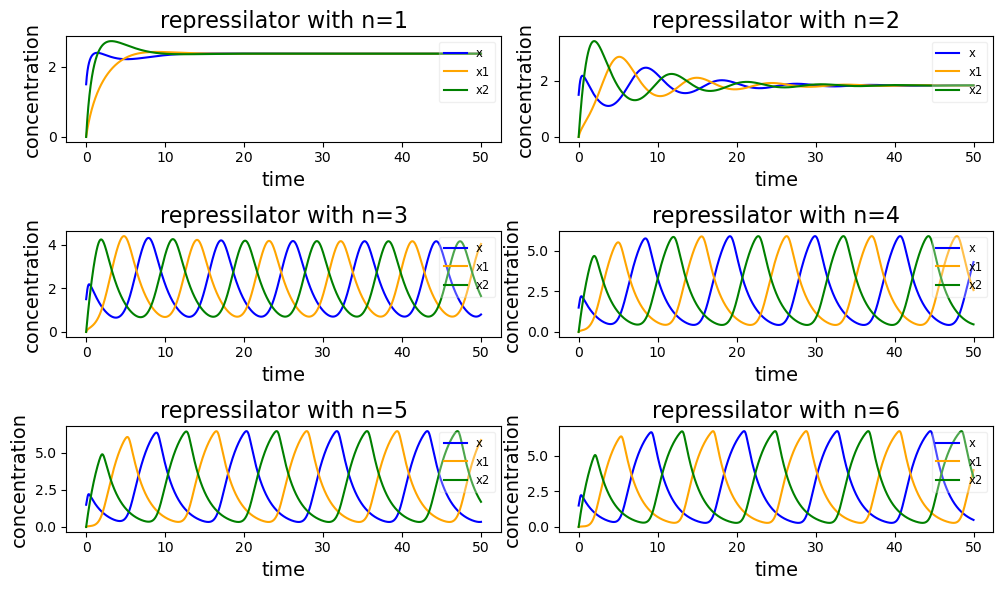

In [6]:
# simulation setting
simu_time=50
timespan=(0,simu_time)
z0=[1.5,0,0]
alpha=0     # external regulation
n=3         # hill coef
d=0.5       # degradation
beta=4      # hill constant


plt.figure(figsize=(10, 6))
for i in range(1,7):
    n=1*i
    results[i]=ode.solve_ivp(repressilator, timespan, z0, t_eval=np.linspace(0,simu_time,simu_time*100+1), method='RK45', rtol=1e-6, atol=1e-9)
    plt.subplot(3, 2, i)
    plt.plot(results[i].t, results[i].y[0], label='x', color='blue', linestyle='-')  # 蓝色实线
    plt.plot(results[i].t, results[i].y[1], label='x1', color='orange', linestyle='-')  # 橙色虚线
    plt.plot(results[i].t, results[i].y[2], label='x2', color='green', linestyle='-')  # 绿色点划线
    plt.title('repressilator with n='+str(n), fontsize=16)
    plt.xlabel('time', fontsize=14)
    plt.ylabel('concentration', fontsize=14)
    plt.legend(loc='upper right',fontsize='small',framealpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# simulation setting
simu_time=50
timespan=(0,simu_time)
z0=[1.5,0,0]
alpha=0     # external regulation
n=3         # hill coef
d=0.5       # degradation
beta=4      # hill constant


plt.figure(figsize=(10, 6))
for i in range(1,7):
    beta=3*i
    results[i]=ode.solve_ivp(repressilator, timespan, z0, t_eval=np.linspace(0,simu_time,simu_time*100+1), method='RK45', rtol=1e-6, atol=1e-9)
    plt.subplot(3, 2, i)
    plt.plot(results[i].t, results[i].y[0], label='x', color='blue', linestyle='-')  # 蓝色实线
    plt.plot(results[i].t, results[i].y[1], label='x1', color='orange', linestyle='-')  # 橙色虚线
    plt.plot(results[i].t, results[i].y[2], label='x2', color='green', linestyle='-')  # 绿色点划线
    plt.title('repressilator with beta='+str(beta), fontsize=16)
    plt.xlabel('time', fontsize=14)
    plt.ylabel('concentration', fontsize=14)
    plt.legend(loc='upper right',fontsize='small',framealpha=0.3)

plt.tight_layout()
plt.show()

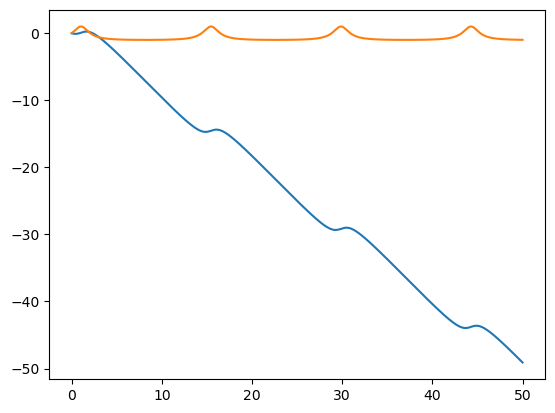

In [ ]:
a=1
w=-0.9
def wsin(t,z):
    dzdt=a-w*np.sin(z)
    return dzdt
test=ode.solve_ivp(wsin, timespan, [0], t_eval=np.linspace(0,simu_time,simu_time*100+1), method='RK45', rtol=1e-6, atol=1e-9)
bias=(a-0.5*w)*test.t
plt.figure()
# plt.plot(test.t, test.y[0]-bias)
sin=np.sin(test.y[0])
plt.plot(test.t,sin)